In [1]:
pip install network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd 

In [3]:
from google.colab import files 
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving sensor.xlsx to sensor (9).xlsx


Saving value.txt to value.txt


In [14]:
import io 
df = pd.read_excel(io.BytesIO(uploaded1['sensor.xlsx']))
vf = pd.read_csv(io.BytesIO(uploaded2['value.txt']))

df_new = df.to_numpy()

last_time_limit_value = vf.columns[0]
the_distance_limit_value = vf.columns[1]
the_frequency_limit_value = vf.columns[2]

print(df_new)
print(vf.columns)

[[ 0.    2.   10.    3.    0.23]
 [ 0.    7.    5.    2.    0.59]
 [ 0.    8.    6.    1.    0.14]
 [ 0.    5.   55.    1.    1.3 ]
 [ 1.    2.    4.    2.    1.6 ]
 [ 1.    7.   86.    4.    0.98]
 [ 1.    6.    8.    2.    0.55]
 [ 1.    5.    6.    1.    0.67]
 [ 3.    4.   15.    2.    0.41]
 [ 3.    5.   72.    3.    0.33]
 [ 5.    6.   14.    2.    1.69]
 [ 8.    6.    9.    2.    1.56]
 [ 7.    5.   16.    1.    1.2 ]]
Index(['25', '1.5', '2'], dtype='object')


In [10]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
  
def Create_the_mat(the_matrix):
  # Defining a Class
  class GraphVisualization:
   
      def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
          self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
      def addEdge(self, a, b):
          temp = [a, b]
          self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
      def visualize(self):
          G = nx.Graph()
          G.add_edges_from(self.visual)
          nx.draw_networkx(G)
          plt.show()
  
# Driver code
  G = GraphVisualization()
  for i in range(len(the_matrix)):
    G.addEdge(the_matrix[i][0], the_matrix[i][1])
  G.visualize()

In [38]:
def cost_function(last_time_limit, the_distance_limit, the_frequency_limit, df_new):
  the_matrix = df_new
  if(last_time_limit==1):
    the_matrix = [row for row in the_matrix if not row[2] > int(last_time_limit_value)]
  if(the_distance_limit==1):
    the_matrix = [row for row in the_matrix if not float(row[4]) > float(the_distance_limit_value)]
  if(the_frequency_limit==1):
    the_matrix = [row for row in the_matrix if not float(row[3]) < float(the_frequency_limit_value)]

  Create_the_mat(the_matrix)  
  return the_matrix[:,0:2]

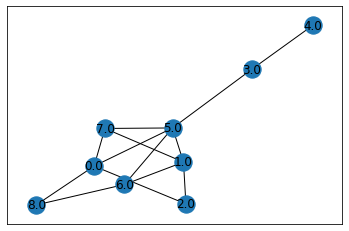

In [39]:
output_matrix = cost_function(0, 0, 0, df_new)

In [45]:
output_matrix

array([[0., 2.],
       [0., 7.],
       [0., 8.],
       [0., 5.],
       [1., 2.],
       [1., 7.],
       [1., 6.],
       [1., 5.],
       [3., 4.],
       [3., 5.],
       [5., 6.],
       [8., 6.],
       [7., 5.]])